<a href="https://colab.research.google.com/github/Etienne-98/2022_ML_EES/blob/main/Personal_Project_Etienne_Delaloye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLEE FINAL PROJECT 

Determination of the water potability as a function of different parameters:
Can we predict what the Potability is going to be according to 9 different parameters? 


## 1. load dataset, import several common modules,...

In [1]:
#@title this cell aims at importing common modules.  😀
'''
First, let's import a few common modules, ensure MatplotLib plots figures inline
and prepare a function to save the figures. We also check that Python 3.5 or 
later is installed (although Python 2.x may work, it is deprecated so we 
strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

''';

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42                               # always put 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot appealing and clear figures
%matplotlib inline
import matplotlib as mpl            # library
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#@title Now let's take a look at our dataset we're interested in diving into: it involves a water potability dataset.

Load dataset and visualize it

In [3]:
#@title Several other common imports ...
import pandas as pd  # pandas
import numpy as np   # numpy
import matplotlib.pyplot as plt # pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split # for splitting data...
from sklearn.preprocessing import MinMaxScaler


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/water_potability.csv') # that's my boy :)) 
#for the record, I downloaded the file directly from my GoogleDrive (after enabling its access via Colab)
#==> so its path was directly fed into the read_csv

We can observe our dataset's shape for instance, as well as other interesting parameters

In [5]:
print('our water potability dataset is of shape:\n',
      data.shape)

our water potability dataset is of shape:
 (3276, 10)


So we end up having to deal with that much of a dataset; not that large though - so for instance it will not be necessary to use dimensionality reduction methods.

In [6]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Our dataset is made of 3276 rows x 10 columns, including a predicted column= the last one: according to a whole bunch of parameters (that means up to 3276 different continuous variables per predictor, e.g. pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic carbon, Trihalomethanes and Turbidity), what is the water quality? --> potable or not? 0=not potable/ 1= potable

In [7]:
data.shape[0] # number of rows 

3276

In [8]:
data.shape[1 # number of columns (including "y" for predicted values)
           ]

10

Let's see a bit more clearly what's going on in terms of values; are there missing ones?
for that we'll recycle some written code of kaggle datasets that we've found and use the function describe()

In [9]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


But that's a bit "wordy" and hard to read... let's transpose the dataframe:

In [10]:
data.describe().T # transpose dataframe

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


we can see that for instance almost 500 pH values are missing. that gives us a clearer insight of the data distribution, which can also be represented as follows:

In [11]:
data.isnull().T # where are the missing values located

,0,1,2,3,4,5,6,7,8,9,...,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275
ph,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Hardness,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Solids,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Chloramines,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sulfate,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,True,True
Conductivity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Organic_carbon,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Trihalomethanes,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Turbidity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Potability,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


But we don't want to end up dealing with Boolean values, do we?

In [12]:
data.isnull().sum() # so as not to deal with thousands of Boolean values but with a sum of them
# we can see that pH, Sulfate and Trihalomethanes lack several hundreds values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

A quick visualisation of the Water Potability Distribution in the form of a barplot:


we can get rid of the NaN values:

In [13]:
data.dropna(inplace=True) #drop NaN values

In [14]:
data['Potability'].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

Text(0.5, 1.0, 'Distribution of Drinkable Water')

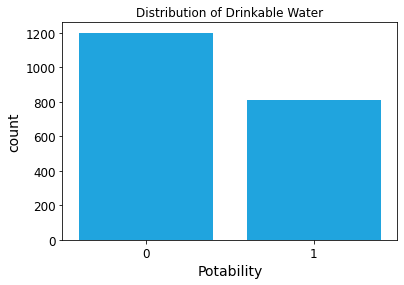

In [15]:
color = '#00b0fe' # set a light-water blue as an HEX color code
sns.countplot(x=data["Potability"], 
              color=color).set_title("Distribution of Drinkable Water")

## Data separation
Let's define our X dataset as X and our y dataset as y; 
- the y column corresponds to the y-predicted (either 0 = non-potable, or 1 = potable) 
- and the independent variables correspond to the X dataset.

In [16]:
X = data.iloc[:,:-1] # X DATASET
print(X)

             ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.5

In [17]:
X # better visualisation

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


So we can see that, after having dropped the NaN values, our dataset drops to 2011 rows x 9 columns

In [18]:
y = data.iloc[:,-1] # y set
print('y dataset is:\n',
y)

y dataset is:
 3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64


In [19]:
#print('y[0]=:\n', y[0],'\n')
     # 'y[1]=:\n', y[1],'\n')
     # 'y[2]=:\n', y[2],'\n',
     # 'y[3]=:\n', y[3],'\n')
     # 'y[4]=:\n', y[4],'\n')
     # 'y[5]=:\n', y[5],'\n')
     # 'y[6]=:\n', y[6],'\n',
      #'y[7]=:\n', y[7],'\n',
      #'y[8]=:\n', y[8]) # visualize y 

separation in train, validation and test sets

In [20]:
#############################################################################################################################################
# 1. Split the data into training set and validation-test set. Set the size of the training set to be 80%
#############################################################################################################################################
Xtrain_val, Xtest, ytrain_val, ytest = train_test_split(X, y, 
                                                train_size=0.8,        # 80% included in train set=1407
                                                test_size=0.2,         # 20% included in the test set=403
                                                random_state=rnd_seed, # random state set to 42
                                                shuffle = True)        # shuffle through the dataset 

In [21]:
#############################################################################################################################################
# 2. Split the validation-test set into validation set and test set. Set the size of the test set to be 80%
#############################################################################################################################################
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain_val, ytrain_val, 
                                                train_size=0.8,        # 80% included in train set=1407
                                                test_size=0.2,         # 20% included in the test set=403
                                                random_state=rnd_seed, # random state set to 42
                                                shuffle = True)        # shuffle through the dataset

We can standardize the training and testing datasets with standardscaler:

In [22]:
# that way we'll have a mean of 0 and a STD of 1
from sklearn import preprocessing
scaler  = preprocessing.StandardScaler() # instantiation
X_train = scaler.fit_transform(Xtrain)
X_test  = scaler.fit_transform(Xtest)

In [23]:
print('X train set:\n ',
      Xtrain.shape,'\n',
      'X test set:\n',
      Xtest.shape,'\n',
      'y train set:\n',
      ytrain.shape,'\n',
      'y test set:\n',
      ytest.shape)

X train set:
  (1286, 9) 
 X test set:
 (403, 9) 
 y train set:
 (1286,) 
 y test set:
 (403,)


1) Now that the data have been split already, what we're trying to do is to train a logistic regression model, as well as a RF classifier to see which of them best fits during training and accuracy testing.

*1.1) Initiate the classifier Random Forest:*

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Initiate Classifiers
rfc = RandomForestClassifier() # RF classifier instantiated

*1.2) Then fit the classifier to the training data*

In [25]:
rfc.fit(X_train, ytrain)

RandomForestClassifier()

In [26]:
# Import accuracy_score module from sklearn:------------------------------------
from sklearn.metrics import accuracy_score

# Then we can use the trained classifiers to make predictions on the validation set:
rfc_pred = rfc.predict(Xval)        # validation data
#------------------------------ on the test data--------------------------------
rfc_preds_test = rfc.predict(Xtest) # on test set (see section 1.3)

###################################################################################################################
# Use accuracy_score() to see if our models can successfully classify the validation data:
rfc_acc = accuracy_score(yval, rfc_pred)             # (y_true, y_pred, *, normalize=True, sample_weight=None)
rfc_acc_test = accuracy_score(ytest, rfc_preds_test) # accuracy on the test set RF

print(f"The RF classifier Model Accuracy on Validation set is: {rfc_acc:.2%}")
print(f"The RF classifier Model Accuracy on Test set is: {rfc_acc_test:.2%}")

The RF classifier Model Accuracy on Validation set is: 58.39%
The RF classifier Model Accuracy on Test set is: 57.32%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


*1.2.1) we can combine the classifiers into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier.*

In [27]:
from sklearn.ensemble import VotingClassifier
################################ and define them ###############################
vc_hard = VotingClassifier(estimators=[('rf',rfc)  # 'rf' standing for randomForest; 
                                       ], 
                           voting='hard')          # Hard Voting
                           #-----------------------#----------------------------
vc_soft = VotingClassifier(estimators=[('rf',rfc)  # Random forest 
                                       ], 
                           voting='soft')          # soft voting

*1.2.2) Then evaluate them on train set, calculate their prediction and estimate their accuracy*

In [28]:
################################        (1)      ###############################
# train voting classifiers------------------------------------------------------
vc_soft.fit(X_train, ytrain)             # soft voting
vc_hard.fit(X_train, ytrain)             # hard voting

################################        (2)      ###############################
# Evaluate classifier performance on validation set. The evaluation will be based on accuracy_score(), similar to previous notebooks.
vc_soft_preds = vc_soft.predict(Xval) # predict on train values
vc_hard_preds = vc_hard.predict(Xval) # idem

################################        (3)      ###############################
# Calculate your accuracy scores here.
vc_soft_acc = accuracy_score(yval, vc_soft_preds)  # (ytrue, ypred)
vc_hard_acc = accuracy_score(yval, vc_hard_preds)  # (ytrue, ypred)

print('our soft-voting classifier did a score of:\n',
      vc_soft_acc,' *100 = ',100*vc_soft_acc,'%.')
print('our hard-voting classifier did a score of:\n',
      vc_hard_acc,'*100 =', 100*vc_hard_acc,'%.')
  

our soft-voting classifier did a score of:
 0.5838509316770186  *100 =  58.38509316770186 %.
our hard-voting classifier did a score of:
 0.5838509316770186 *100 = 58.38509316770186 %.


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


*1.3) Let's see what the ensemble does when trained on the test set and see if it outperforms the classifiers. We'll get our Test Accuracy in the end.*

In [29]:
# 
################################################################################
# Individual Classifier predictions
################################################################################ 
rfc_preds_test = rfc.predict(X_test) # random forest classifier

################################################################################
# Voting Classifier predictions
################################################################################ 
vc_soft_preds_test = vc_soft.predict(X_test)
vc_hard_preds_test = vc_hard.predict(X_test)
################################################################################
# Compare accuracy scores
################################################################################ 
vc_soft_acc_test = accuracy_score(ytest, vc_soft_preds_test) # accuracy on the test set soft-voting
vc_hard_acc_test = accuracy_score(ytest, vc_hard_preds_test) # accuracy on the test set hard-voting
rfc_acc_test     = accuracy_score(ytest, rfc_preds_test)     # accuracy on the test set RF


print("VC soft accuracy score is:\n", 
      vc_soft_acc_test, ' *100 = ',100*vc_soft_acc_test,'%.')
print("VC hard accuracy score is:\n:", 
      vc_hard_acc_test, ' *100 = ',100*vc_hard_acc_test,'%.')
print("RandomForest accuracy score is:\n ", 
      rfc_acc_test, ' *100 = ',100*rfc_acc_test,'%.')

VC soft accuracy score is:
 0.6550868486352357  *100 =  65.50868486352357 %.
VC hard accuracy score is:
: 0.6575682382133995  *100 =  65.75682382133995 %.
RandomForest accuracy score is:
  0.6550868486352357  *100 =  65.50868486352357 %.


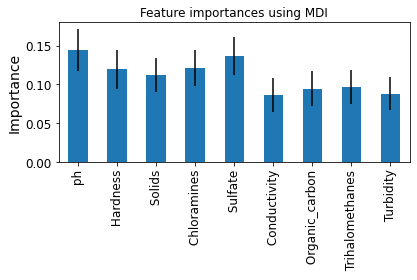

In [30]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# define the model
rfc = RandomForestClassifier()
# fit the model
rfc.fit(Xtrain, ytrain)
# get importance
importance = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

feature_names = [f" {i}" for i in data.columns.values.tolist()[:-1]]
forest_importances = pd.Series(importance,
                               index= feature_names)

#------------------------------- visualization----------------------------------
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Importance")
fig.tight_layout()

2) Logistic Regression 

*2.1.) Use of Logistic Regression without hyperparameters fine-tuning*

In [31]:
#let's browse through log regression:
#  sklearn.linear_model.LogisticRegression(penalty='l2', *, 
#dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
# class_weight=None, random_state=None, solver='lbfgs', max_iter=100,
# multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
from sklearn.linear_model import LogisticRegression

# ------------------------------ instantiation ---------------------------------
log_reg = LogisticRegression()
# ------------------------------ fitting ---------------------------------------
log_reg.fit(X_train, ytrain) 
# ------------------------------ predict ---------------------------------------
ypred = log_reg.predict(X_test)
# ------------------------------ accuracy --------------------------------------
print("The logistic regression classifier's accuracy on test set is: {:.2f}".format(log_reg.score(X_test, ytest)))
print("The logistic regression classifier's accuracy on validate set is: {:.2f}".format(log_reg.score(Xtrain_val, ytrain_val)))
print("The logistic regression classifier's accuracy on train set is: {:.2f}".format(log_reg.score(X_train, ytrain)))

# let's print the accuracy score ...
log_acc = accuracy_score(ytest, ypred)  # Feed in the truth and predictions

print(f"Logistic Regression Model Accuracy is: {log_acc:.2%}")


The logistic regression classifier's accuracy on test set is: 0.58
The logistic regression classifier's accuracy on validate set is: 0.40
The logistic regression classifier's accuracy on train set is: 0.61
Logistic Regression Model Accuracy is: 57.57%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


*2.2.) Use of Logistic Regression with best hyperparameters fine-tuning*

It is indeed more accurate to rely on a model upon which chosen hyperparameters have been fine-tuned. This will help the algorithm work best (hopefully) for the type of data at our disposal.
Thus we have decided to use GridSearchCV, which helps for a better grasping of the hyperparameters by applying the trial-and-error method that will chose from all combinations, the the best HP value when testing (using k-folds cross-validation).

It will cross-validate through our data while testing and training. To do so we can create a parameter dictionary containing all different HP we want the model to try when fitting.Lee(2021) provided very good illustration and understanding relative to binary classification issues.
  

In [32]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# ------------------------------ parameter grid --------------------------------------
parameters = {
    'penalty' : ['l1','l2'],                         # using the various HP possible
    'C'       : np.logspace(-3,3,7),                 # C = inverse of regularistion strength--> the smaller C, the stronger the regularisation
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'], # algorithm used with optimization
}

In [33]:
log_reg2 = LogisticRegression()               # instantiation (as beforhand)

clf = GridSearchCV(log_reg2,                  # the model used
                   param_grid = parameters,   # the different possible hyperparameters 
                   scoring='accuracy',        # metric for scoring ==> the expected outcome
                   cv=10)                     # number of folds (k-fold)


#then comes the same basic methodology...
# ------------------------------ fitting ---------------------------------------
clf.fit(X_train, ytrain)
# ------------------------------ print out best HP -----------------------------
print("Tuned Hyperparameters are :", 
      clf.best_params_) # using .best_params
# ------------------------------ print training accuracy  ---------------------------------------
print("Accuracy is :",
      clf.best_score_*100,'%')  # using .best_score

Tuned Hyperparameters are : {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy is : 61.35295542635658 %


In [34]:
# now we can apply the HP to the log regression as GridSearchCV suggested:
# Tuned Hyperparameters are : {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}==> we get a higher accuracy by putting exactly
# other hyperparameters... GREAT!
log_reg2 = LogisticRegression(C = 0.1,                # inverse of regularization, let's not trust the model and put 0.1 instead
                            penalty = 'l2',           # penalty (essentially supposed to be l1)
                            solver = 'newton-cg')     # solver (essentially supposed to be liblinear)
                            #-------#
log_reg2.fit(X_train,ytrain)                          # fitting
y_pred2 = log_reg2.predict(X_test)                    # predicting
print("The Logistic Regression algorithm has an accuracy of ",
      log_reg2.score(X_test, ytest)*100,
      '%')                                             # accuracy estimating

The Logistic Regression algorithm has an accuracy of  57.5682382133995 %


*2.3)Let's visualize the confusion matrix now for Logistic Regression...*

In [35]:
from sklearn.metrics import classification_report
print('Classification report for Log reg without HP:\n',
      classification_report(ytest,ypred))
print('Classification report for Log reg with HP:\n',
      classification_report(ytest,y_pred2))

Classification report for Log reg without HP:
               precision    recall  f1-score   support

           0       0.58      0.99      0.73       231
           1       0.60      0.02      0.03       172

    accuracy                           0.58       403
   macro avg       0.59      0.50      0.38       403
weighted avg       0.59      0.58      0.43       403

Classification report for Log reg with HP:
               precision    recall  f1-score   support

           0       0.58      0.99      0.73       231
           1       0.60      0.02      0.03       172

    accuracy                           0.58       403
   macro avg       0.59      0.50      0.38       403
weighted avg       0.59      0.58      0.43       403



In [36]:
# define the model
# model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: ignored

In [ ]:
print(f" Xtrain:{Xtrain.shape}, ytrain:{ytrain.shape}") #shapes of training sets 
print(f" Xtest:{Xtest.shape}, ytest:{ytest.shape}")     #shapes of test sets

Let's take a sneak peek at our train dataset Xtrain: we can see how much of the water is potable or not:

In [ ]:
Xtrain.describe()

Then we'll set up a categorical attribute pipeline using  an imputer using SimpleImputer with "most_frequent" set as the strategy and a "cat_encoder" that uses a OneHotEncoder with the sparse parameter set to False (cf Notebook Classification)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

In [ ]:
# 1) DO NOT RUN THIS CELL Let's import the classes we'll need from scikit-learn in order to set up
# our data pipeline.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# The Pipeline needs to be initiated with a list containing the name of the
# preprocessor (e.g., "imputer" or "scaler").
num_pipeline = Pipeline([                           # We'll instantiate the pipeline class
     ("imputer", SimpleImputer(strategy="mean")),   # Which will use the imputer
     ("scaler", StandardScaler() ) ])               # as well as the scaler
#===============================================================================

# 2)
from sklearn import pipeline 
# Let's import the One Hot Encoder function from scikit-learn, and set up our
# categorical data pipeline-----------------------------------------------------
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline( [                                # We instantiate the pipeline class...
    ("imputer", SimpleImputer(strategy="most_frequent")), # ...And set up an imputer with a strategy set to most frequent...
    ("cat_encoder", OneHotEncoder(sparse=False)) ] )      # ...and an encoder with a given sparsity parameter

In [ ]:
# DO NOT RUN THIS CELL Let's import the scikit implementation of random forest classifiers
from sklearn.ensemble import RandomForestClassifier

# And now let's instantiate the RandomForestClassifier class
forest_clf = RandomForestClassifier(n_estimators=100,      # Set our number of estimators to 100
                                    random_state=rnd_seed) # And set our random seed for consistent results

# We end by fitting the model
forest_clf.fit(Xtrain,ytrain) # fit(xtrain, ytrain) 



Now we can predict a set of answers using the trained model and compare it using the accuracy_score metric

In [ ]:
#DO NOT RUN THIS CELL
X_train_augmented = [i for i in Xtrain]
X_train_augmented = np.asarray(X_train_augmented)
y_train_augmented = [j for j in ytrain]
y_train_augmented = np.asarray(y_train_augmented)
# Generate scrambled indices list
aug_shuffler = rnd_gen.permutation(len(X_train_augmented))

# Shuffle the array using the scrambled indices - that way the input data order
# matches the target data order
X_train_augmented = X_train_augmented[aug_shuffler]
y_train_augmented = y_train_augmented[aug_shuffler]

In [ ]:
#DO NOT RUN THIS CELL
# accuracy_score(y_true, y_pred)
# Begin by importing the KNeighersClassifier and GridSearchCV from scikit.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Instantiate the imported model class
knn_clf = KNeighborsClassifier()
#---------------------------------- (1) ----------------------------------------
# Let's instantiate the scikit class used to do grid searches
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )

grid_search.fit(Xtrain, ytrain)    
#---------------------------------- (2) ----------------------------------------

# Let's import the accuracy score implementation in scikit-learn
from sklearn.metrics import accuracy_score

# Then let's get predictions from our model
y_pred = grid_search.predict(X_train_augmented)

# Let's calculate the accuracy...
accuracy = accuracy_score(y_train_augmented, # We'll need our ground truth
                   y_pred) # and our predictions
print(f'The accuracy we got on our training dataset is {accuracy:.1%}')
# with x_train_augmented and ytrainaugmented/ ypred ==> accuracy 94.4%

So apparently we came across quite a screwed up code...
try something else

*2.4) From a written code on Kaggle, that we recycled there, we calculated the accuracy of RF classifier algorithm.*

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
#knn = KNeighborsClassifier()

#dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

#ada = AdaBoostClassifier()

#xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


#para_knn = {'n_neighbors':np.arange(1, 50)}             #parameters of knn
#grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
#para_dt = {'criterion':['gini','entropy'],
 #          'max_depth':np.arange(1, 50), 
  #         'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
#grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv

#============================== random forest ==================================
params_rf = {'n_estimators':[100,200, 350, 500],
             'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
#params_ada = {'n_estimators': [50,100,250,400,500,600], 
 #             'learning_rate': [0.2,0.5,0.8,1]}
#grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
#params_xgb = {'n_estimators': [50,100,250,400,600,800,1000],
 #             'learning_rate': [0.2,0.5,0.8,1]}
#rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

In [38]:
#grid_knn.fit(Xtrain, ytrain)
#grid_dt.fit(Xtrain, ytrain)
grid_rf.fit(X_train, ytrain)

# find the best parameters ...
#print("Best parameters for KNN:", 
 #     grid_knn.best_params_)
#print("Best parameters for Decision Tree:", 
 #     grid_dt.best_params_)
print("Best parameters for Random Forest:", 
      grid_rf.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}


We can then calculate our accuracy based on ground truth and predictions:


In [41]:
models = [
    #('K Nearest Neighbours', knn),
     #     ('Decision Tree', dt), 
          ('Random Forest', rf)] # we only opted for the 3 models there, but focusing on random forest (more promising)


for model_name, model in models:
 
    model.fit(X_train, ytrain)                     # fitting model
    y_predicted = model.predict(Xtest)            # calculate y predicted
    accuracy    = accuracy_score(ytest,y_predicted)     # that's the accuracy

    print('{:s} : {:.2f}'.format(model_name, accuracy))

Random Forest : 0.57


Accuracy obtained: 66%

cm=metrics.confusion_matrix(test_labels,pred)
print(cm)
plt.imshow(cm, cmap='binary')

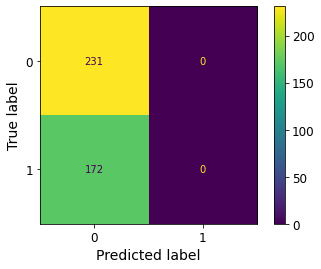

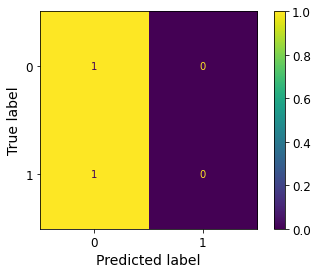

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(ytest,y_predicted)
disp = ConfusionMatrixDisplay(cm).plot()

cm_normalized = confusion_matrix(ytest, y_predicted, normalize='true')
disp_normalized = ConfusionMatrixDisplay(cm_normalized).plot()